In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics


from warnings import filterwarnings
filterwarnings('ignore')

In [3]:
path="/content/drive/MyDrive/PD_modelling_dataset.xlsx"

Dataframe read the file

In [4]:
df=pd.read_excel(path)

Copy of file have created

In [5]:
copy=df.copy()

Info of dataset

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99976 entries, 0 to 99975
Data columns (total 36 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   userid                            99976 non-null  int64  
 1   default                           89976 non-null  float64
 2   acct_amt_added_12_24m             99976 non-null  int64  
 3   acct_days_in_dc_12_24m            88140 non-null  float64
 4   acct_days_in_rem_12_24m           88140 non-null  float64
 5   acct_days_in_term_12_24m          88140 non-null  float64
 6   acct_incoming_debt_vs_paid_0_24m  40661 non-null  float64
 7   acct_status                       45603 non-null  float64
 8   acct_worst_status_0_3m            45603 non-null  float64
 9   acct_worst_status_12_24m          33215 non-null  float64
 10  acct_worst_status_3_6m            42274 non-null  float64
 11  acct_worst_status_6_12m           39626 non-null  float64
 12  age 

In [7]:
df.head()

,userid,default,acct_amt_added_12_24m,acct_days_in_dc_12_24m,acct_days_in_rem_12_24m,acct_days_in_term_12_24m,acct_incoming_debt_vs_paid_0_24m,acct_status,acct_worst_status_0_3m,acct_worst_status_12_24m,...,num_arch_ok_12_24m,num_arch_rem_0_12m,status_max_archived_0_6_months,status_max_archived_0_12_months,status_max_archived_0_24_months,recovery_debt,sum_capital_paid_acct_0_12m,sum_capital_paid_acct_12_24m,sum_paid_inv_0_12m,time_hours
0,4567129,0.0,0,0.0,0.0,0.0,0.0,1.0,1.0,NaN,...,14.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,178839.0,9.653333
1,2635118,0.0,0,0.0,0.0,0.0,NaN,1.0,1.0,1.0,...,19.0,3.0,1.0,2.0,2.0,0.0,0.0,0.0,49014.0,13.181389
2,4804232,0.0,0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,...,0.0,3.0,1.0,2.0,2.0,0.0,0.0,0.0,124839.0,11.561944
3,1442693,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,21.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,324676.0,15.751111
4,4575322,0.0,0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,...,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,7100.0,12.698611


In [8]:
df.tail()

,userid,default,acct_amt_added_12_24m,acct_days_in_dc_12_24m,acct_days_in_rem_12_24m,acct_days_in_term_12_24m,acct_incoming_debt_vs_paid_0_24m,acct_status,acct_worst_status_0_3m,acct_worst_status_12_24m,...,num_arch_ok_12_24m,num_arch_rem_0_12m,status_max_archived_0_6_months,status_max_archived_0_12_months,status_max_archived_0_24_months,recovery_debt,sum_capital_paid_acct_0_12m,sum_capital_paid_acct_12_24m,sum_paid_inv_0_12m,time_hours
99971,3115649,NaN,0,0.0,0.0,0.0,NaN,1.0,1.0,NaN,...,2.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,60127.0,10.765556
99972,1744943,NaN,0,0.0,0.0,0.0,0.004044,1.0,1.0,NaN,...,3.0,0.0,0.0,1.0,1.0,0.0,7948.0,0.0,4740.0,21.708333
99973,4333001,NaN,45671,0.0,20.0,0.0,0.705078,2.0,2.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,17447.0,19627.0,3100.0,2.185278
99974,4648093,NaN,56102,0.0,0.0,0.0,0.064175,1.0,2.0,1.0,...,1.0,0.0,1.0,1.0,1.0,0.0,18339.0,56180.0,34785.0,9.725278
99975,1247657,NaN,0,0.0,0.0,0.0,NaN,1.0,1.0,NaN,...,2.0,1.0,2.0,2.0,2.0,0.0,0.0,0.0,30602.0,11.585278


In [9]:
df.dropna(subset=['default'], inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 89976 entries, 0 to 89975
Data columns (total 36 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   userid                            89976 non-null  int64  
 1   default                           89976 non-null  float64
 2   acct_amt_added_12_24m             89976 non-null  int64  
 3   acct_days_in_dc_12_24m            79293 non-null  float64
 4   acct_days_in_rem_12_24m           79293 non-null  float64
 5   acct_days_in_term_12_24m          79293 non-null  float64
 6   acct_incoming_debt_vs_paid_0_24m  36619 non-null  float64
 7   acct_status                       41042 non-null  float64
 8   acct_worst_status_0_3m            41042 non-null  float64
 9   acct_worst_status_12_24m          29921 non-null  float64
 10  acct_worst_status_3_6m            38038 non-null  float64
 11  acct_worst_status_6_12m           35663 non-null  float64
 12  age      

In [11]:
df.describe()

,userid,default,acct_amt_added_12_24m,acct_days_in_dc_12_24m,acct_days_in_rem_12_24m,acct_days_in_term_12_24m,acct_incoming_debt_vs_paid_0_24m,acct_status,acct_worst_status_0_3m,acct_worst_status_12_24m,...,num_arch_ok_12_24m,num_arch_rem_0_12m,status_max_archived_0_6_months,status_max_archived_0_12_months,status_max_archived_0_24_months,recovery_debt,sum_capital_paid_acct_0_12m,sum_capital_paid_acct_12_24m,sum_paid_inv_0_12m,time_hours
count,8.997600e+04,89976.000000,8.997600e+04,79293.000000,79293.000000,79293.000000,36619.000000,41042.000000,41042.000000,29921.000000,...,80032.000000,80032.000000,80032.000000,80032.000000,80032.000000,80032.000000,80032.000000,80032.000000,8.003200e+04,80032.000000
mean,2.998571e+06,0.014315,1.227615e+04,0.217333,5.073840,0.287894,1.330536,1.041665,1.173286,1.339227,...,6.863305,0.482282,0.821634,1.074120,1.248276,3.556402,10875.444472,6656.835291,4.105618e+04,15.347632
std,1.154905e+06,0.118786,3.546356e+04,5.629972,22.957817,2.930697,26.924730,0.201766,0.420694,0.575655,...,16.124059,1.386458,0.716266,0.776238,0.820761,113.850993,26664.815083,19408.760346,9.324579e+04,5.032355
min,1.000053e+06,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000278
25%,1.998872e+06,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,3.460000e+03,11.641042
50%,2.997714e+06,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.153818,1.000000,1.000000,1.000000,...,2.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.708500e+04,15.818611
75%,4.001145e+06,0.000000,4.984250e+03,0.000000,0.000000,0.000000,0.664694,1.000000,1.000000,2.000000,...,7.000000,0.000000,1.000000,2.000000,2.000000,0.000000,8989.250000,190.000000,4.586500e+04,19.561667
max,4.999868e+06,1.000000,1.128775e+06,362.000000,365.000000,97.000000,3914.000000,4.000000,4.000000,4.000000,...,313.000000,42.000000,3.000000,5.000000,5.000000,16411.000000,571475.000000,341859.000000,2.962870e+06,23.999722


In [12]:
df['acct_days_in_dc_12_24m']=df['acct_days_in_dc_12_24m'].fillna(0)

In [13]:
df.acct_days_in_dc_12_24m.isnull().sum()

0

In [14]:
df['acct_days_in_rem_12_24m']=df['acct_days_in_rem_12_24m'].fillna(0)

In [15]:
df.acct_days_in_rem_12_24m.isnull().sum()

0

In [16]:
df['acct_days_in_term_12_24m']=df['acct_days_in_term_12_24m'].fillna(0)

In [17]:
df.acct_days_in_term_12_24m.isnull().sum()

0

In [18]:
df['acct_incoming_debt_vs_paid_0_24m']=df['acct_incoming_debt_vs_paid_0_24m'].fillna(0)

In [19]:
df.acct_incoming_debt_vs_paid_0_24m.isnull().sum()

0

In [20]:
df['acct_status']=df['acct_status'].fillna(0)

In [21]:
df.acct_status.isnull().sum()

0

In [22]:
df['acct_worst_status_0_3m']=df['acct_worst_status_0_3m'].fillna(0)

In [23]:
df.acct_worst_status_0_3m.isnull().sum()

0

In [24]:
df['acct_worst_status_12_24m']=df['acct_worst_status_12_24m'].fillna(0)

In [25]:
df.acct_worst_status_12_24m.isnull().sum()

0

In [26]:
df['acct_worst_status_3_6m']=df['acct_worst_status_3_6m'].fillna(0)

In [27]:
df.acct_worst_status_3_6m.isnull().sum()

0

In [28]:
df['acct_worst_status_6_12m']=df['acct_worst_status_6_12m'].fillna(0)

In [29]:
df.acct_worst_status_6_12m.isnull().sum()

0

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 89976 entries, 0 to 89975
Data columns (total 36 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   userid                            89976 non-null  int64  
 1   default                           89976 non-null  float64
 2   acct_amt_added_12_24m             89976 non-null  int64  
 3   acct_days_in_dc_12_24m            89976 non-null  float64
 4   acct_days_in_rem_12_24m           89976 non-null  float64
 5   acct_days_in_term_12_24m          89976 non-null  float64
 6   acct_incoming_debt_vs_paid_0_24m  89976 non-null  float64
 7   acct_status                       89976 non-null  float64
 8   acct_worst_status_0_3m            89976 non-null  float64
 9   acct_worst_status_12_24m          89976 non-null  float64
 10  acct_worst_status_3_6m            89976 non-null  float64
 11  acct_worst_status_6_12m           89976 non-null  float64
 12  age      

In [31]:
## Let's create a range variable to understand how many records we have in different slabs

age_range = pd.cut(df["age"],
                     bins=[18, 28, 42, 60, 100],
                     labels=["Young age", "Middle age", " Senior", "Old"])
df["age_range"] = age_range


In [32]:
age_range.value_counts()

age
Middle age    31963
Young age     27875
 Senior       22456
Old            4361
Name: count, dtype: int64

In [33]:
df.columns

Index(['userid', 'default', 'acct_amt_added_12_24m', 'acct_days_in_dc_12_24m',
       'acct_days_in_rem_12_24m', 'acct_days_in_term_12_24m',
       'acct_incoming_debt_vs_paid_0_24m', 'acct_status',
       'acct_worst_status_0_3m', 'acct_worst_status_12_24m',
       'acct_worst_status_3_6m', 'acct_worst_status_6_12m', 'age',
       'avg_payment_span_0_12m', 'avg_payment_span_0_3m', 'merchant_category',
       'merchant_group', 'has_paid', 'max_paid_inv_0_12m',
       'max_paid_inv_0_24m', 'name_in_email',
       'num_active_div_by_paid_inv_0_12m', 'num_active_inv',
       'num_arch_dc_0_12m', 'num_arch_dc_12_24m', 'num_arch_ok_0_12m',
       'num_arch_ok_12_24m', 'num_arch_rem_0_12m',
       'status_max_archived_0_6_months', 'status_max_archived_0_12_months',
       'status_max_archived_0_24_months', 'recovery_debt',
       'sum_capital_paid_acct_0_12m', 'sum_capital_paid_acct_12_24m',
       'sum_paid_inv_0_12m', 'time_hours', 'age_range'],
      dtype='object')

Imputed by median

In [34]:
df['avg_payment_span_0_12m']=df['avg_payment_span_0_12m'].fillna(df.avg_payment_span_0_12m.median())

In [35]:
df.avg_payment_span_0_12m.isnull().sum()

0

In [36]:
df['avg_payment_span_0_3m']=df['avg_payment_span_0_3m'].fillna(df.avg_payment_span_0_3m.median())

In [37]:
df.avg_payment_span_0_3m.isnull().sum()

0

In [38]:
df.merchant_group.unique()

array(['Health & Beauty', 'Entertainment', 'Electronics', 'Leisure',
       'Clothing & Shoes', 'Children Products', 'Home & Garden',
       'Jewelry & Accessories', 'Intangible products',
       'Automotive Products', 'Erotic Materials', 'Food & Beverage', nan],
      dtype=object)

In [39]:
df['merchant_group']=df['merchant_group'].fillna('Food & Beverage')

In [40]:
df.merchant_group.value_counts()

merchant_group
Entertainment            43940
Clothing & Shoes         15033
Leisure                   9935
Health & Beauty           6589
Children Products         4614
Home & Garden             3350
Electronics               2704
Intangible products       1017
Jewelry & Accessories      946
Automotive Products        848
Erotic Materials           670
Food & Beverage            330
Name: count, dtype: int64

In [41]:
df.merchant_group.isnull().sum()

0

In [42]:
df.default.value_counts()

default
0.0    88688
1.0     1288
Name: count, dtype: int64

In [43]:
df.avg_payment_span_0_12m.describe()

count    89976.000000
mean        17.244683
std         11.249257
min          0.000000
25%         12.200000
50%         14.904762
75%         18.600000
max        260.000000
Name: avg_payment_span_0_12m, dtype: float64

In [44]:
df['has_paid']=df['has_paid'].fillna(0)

In [45]:
df.has_paid=np.where(df.has_paid=='True',0,df.has_paid)

In [46]:
df.has_paid.isnull().sum()

0

In [47]:
df.has_paid.value_counts()

has_paid
1.0    69287
0.0    20689
Name: count, dtype: int64

In [48]:
df.max_paid_inv_0_12m.median()

6180.0

In [49]:
df.max_paid_inv_0_12m=df.max_paid_inv_0_12m.fillna(df.max_paid_inv_0_12m.median())

In [50]:
df.max_paid_inv_0_12m.isnull().sum()

0

In [51]:
df.max_paid_inv_0_24m=df.max_paid_inv_0_24m.fillna(df.max_paid_inv_0_24m.median())

In [52]:
df.max_paid_inv_0_24m.isnull().sum()

0

In [53]:
df.num_active_div_by_paid_inv_0_12m=df.num_active_div_by_paid_inv_0_12m.fillna(df.num_active_div_by_paid_inv_0_12m.median())

In [54]:
df.num_active_div_by_paid_inv_0_12m.isnull().sum()

0

In [55]:
df.num_active_inv=df.num_active_inv.fillna(df.num_active_inv.median())

In [56]:
df.num_active_inv.isnull().sum()

0

In [57]:
df.drop(['name_in_email'],inplace=True,axis=1)

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 89976 entries, 0 to 89975
Data columns (total 36 columns):
 #   Column                            Non-Null Count  Dtype   
---  ------                            --------------  -----   
 0   userid                            89976 non-null  int64   
 1   default                           89976 non-null  float64 
 2   acct_amt_added_12_24m             89976 non-null  int64   
 3   acct_days_in_dc_12_24m            89976 non-null  float64 
 4   acct_days_in_rem_12_24m           89976 non-null  float64 
 5   acct_days_in_term_12_24m          89976 non-null  float64 
 6   acct_incoming_debt_vs_paid_0_24m  89976 non-null  float64 
 7   acct_status                       89976 non-null  float64 
 8   acct_worst_status_0_3m            89976 non-null  float64 
 9   acct_worst_status_12_24m          89976 non-null  float64 
 10  acct_worst_status_3_6m            89976 non-null  float64 
 11  acct_worst_status_6_12m           89976 non-null  float64 


In [59]:
copy.isnull().sum()

userid                                  0
default                             10000
acct_amt_added_12_24m                   0
acct_days_in_dc_12_24m              11836
acct_days_in_rem_12_24m             11836
acct_days_in_term_12_24m            11836
acct_incoming_debt_vs_paid_0_24m    59315
acct_status                         54373
acct_worst_status_0_3m              54373
acct_worst_status_12_24m            66761
acct_worst_status_3_6m              57702
acct_worst_status_6_12m             60350
age                                     0
avg_payment_span_0_12m              23836
avg_payment_span_0_3m               49305
merchant_category                       0
merchant_group                          9
has_paid                            11034
max_paid_inv_0_12m                  11034
max_paid_inv_0_24m                  11034
name_in_email                       11034
num_active_div_by_paid_inv_0_12m    29925
num_active_inv                      11034
num_arch_dc_0_12m                 

In [60]:
columns_to_impute = df.columns[23:37]

In [61]:
copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99976 entries, 0 to 99975
Data columns (total 36 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   userid                            99976 non-null  int64  
 1   default                           89976 non-null  float64
 2   acct_amt_added_12_24m             99976 non-null  int64  
 3   acct_days_in_dc_12_24m            88140 non-null  float64
 4   acct_days_in_rem_12_24m           88140 non-null  float64
 5   acct_days_in_term_12_24m          88140 non-null  float64
 6   acct_incoming_debt_vs_paid_0_24m  40661 non-null  float64
 7   acct_status                       45603 non-null  float64
 8   acct_worst_status_0_3m            45603 non-null  float64
 9   acct_worst_status_12_24m          33215 non-null  float64
 10  acct_worst_status_3_6m            42274 non-null  float64
 11  acct_worst_status_6_12m           39626 non-null  float64
 12  age 

In [62]:
df.num_active_inv.describe()

count    89976.000000
mean         0.556471
std          1.526366
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max         47.000000
Name: num_active_inv, dtype: float64

In [63]:
for i in range(22,35):
  a=df.columns[i]
  df[a]=df[a].fillna(0)

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 89976 entries, 0 to 89975
Data columns (total 36 columns):
 #   Column                            Non-Null Count  Dtype   
---  ------                            --------------  -----   
 0   userid                            89976 non-null  int64   
 1   default                           89976 non-null  float64 
 2   acct_amt_added_12_24m             89976 non-null  int64   
 3   acct_days_in_dc_12_24m            89976 non-null  float64 
 4   acct_days_in_rem_12_24m           89976 non-null  float64 
 5   acct_days_in_term_12_24m          89976 non-null  float64 
 6   acct_incoming_debt_vs_paid_0_24m  89976 non-null  float64 
 7   acct_status                       89976 non-null  float64 
 8   acct_worst_status_0_3m            89976 non-null  float64 
 9   acct_worst_status_12_24m          89976 non-null  float64 
 10  acct_worst_status_3_6m            89976 non-null  float64 
 11  acct_worst_status_6_12m           89976 non-null  float64 


In [65]:
age_range.value_counts()

age
Middle age    31963
Young age     27875
 Senior       22456
Old            4361
Name: count, dtype: int64

In [66]:
num=df.select_dtypes(include=['int64','float64'])

In [67]:
num.info()

<class 'pandas.core.frame.DataFrame'>
Index: 89976 entries, 0 to 89975
Data columns (total 33 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   userid                            89976 non-null  int64  
 1   default                           89976 non-null  float64
 2   acct_amt_added_12_24m             89976 non-null  int64  
 3   acct_days_in_dc_12_24m            89976 non-null  float64
 4   acct_days_in_rem_12_24m           89976 non-null  float64
 5   acct_days_in_term_12_24m          89976 non-null  float64
 6   acct_incoming_debt_vs_paid_0_24m  89976 non-null  float64
 7   acct_status                       89976 non-null  float64
 8   acct_worst_status_0_3m            89976 non-null  float64
 9   acct_worst_status_12_24m          89976 non-null  float64
 10  acct_worst_status_3_6m            89976 non-null  float64
 11  acct_worst_status_6_12m           89976 non-null  float64
 12  age      

In [68]:
num.columns

Index(['userid', 'default', 'acct_amt_added_12_24m', 'acct_days_in_dc_12_24m',
       'acct_days_in_rem_12_24m', 'acct_days_in_term_12_24m',
       'acct_incoming_debt_vs_paid_0_24m', 'acct_status',
       'acct_worst_status_0_3m', 'acct_worst_status_12_24m',
       'acct_worst_status_3_6m', 'acct_worst_status_6_12m', 'age',
       'avg_payment_span_0_12m', 'avg_payment_span_0_3m', 'has_paid',
       'max_paid_inv_0_12m', 'max_paid_inv_0_24m',
       'num_active_div_by_paid_inv_0_12m', 'num_active_inv',
       'num_arch_dc_0_12m', 'num_arch_dc_12_24m', 'num_arch_ok_0_12m',
       'num_arch_ok_12_24m', 'num_arch_rem_0_12m',
       'status_max_archived_0_6_months', 'status_max_archived_0_12_months',
       'status_max_archived_0_24_months', 'recovery_debt',
       'sum_capital_paid_acct_0_12m', 'sum_capital_paid_acct_12_24m',
       'sum_paid_inv_0_12m', 'time_hours'],
      dtype='object')

In [69]:
num.shape

(89976, 33)

BI-VARIATE ANALYSIS

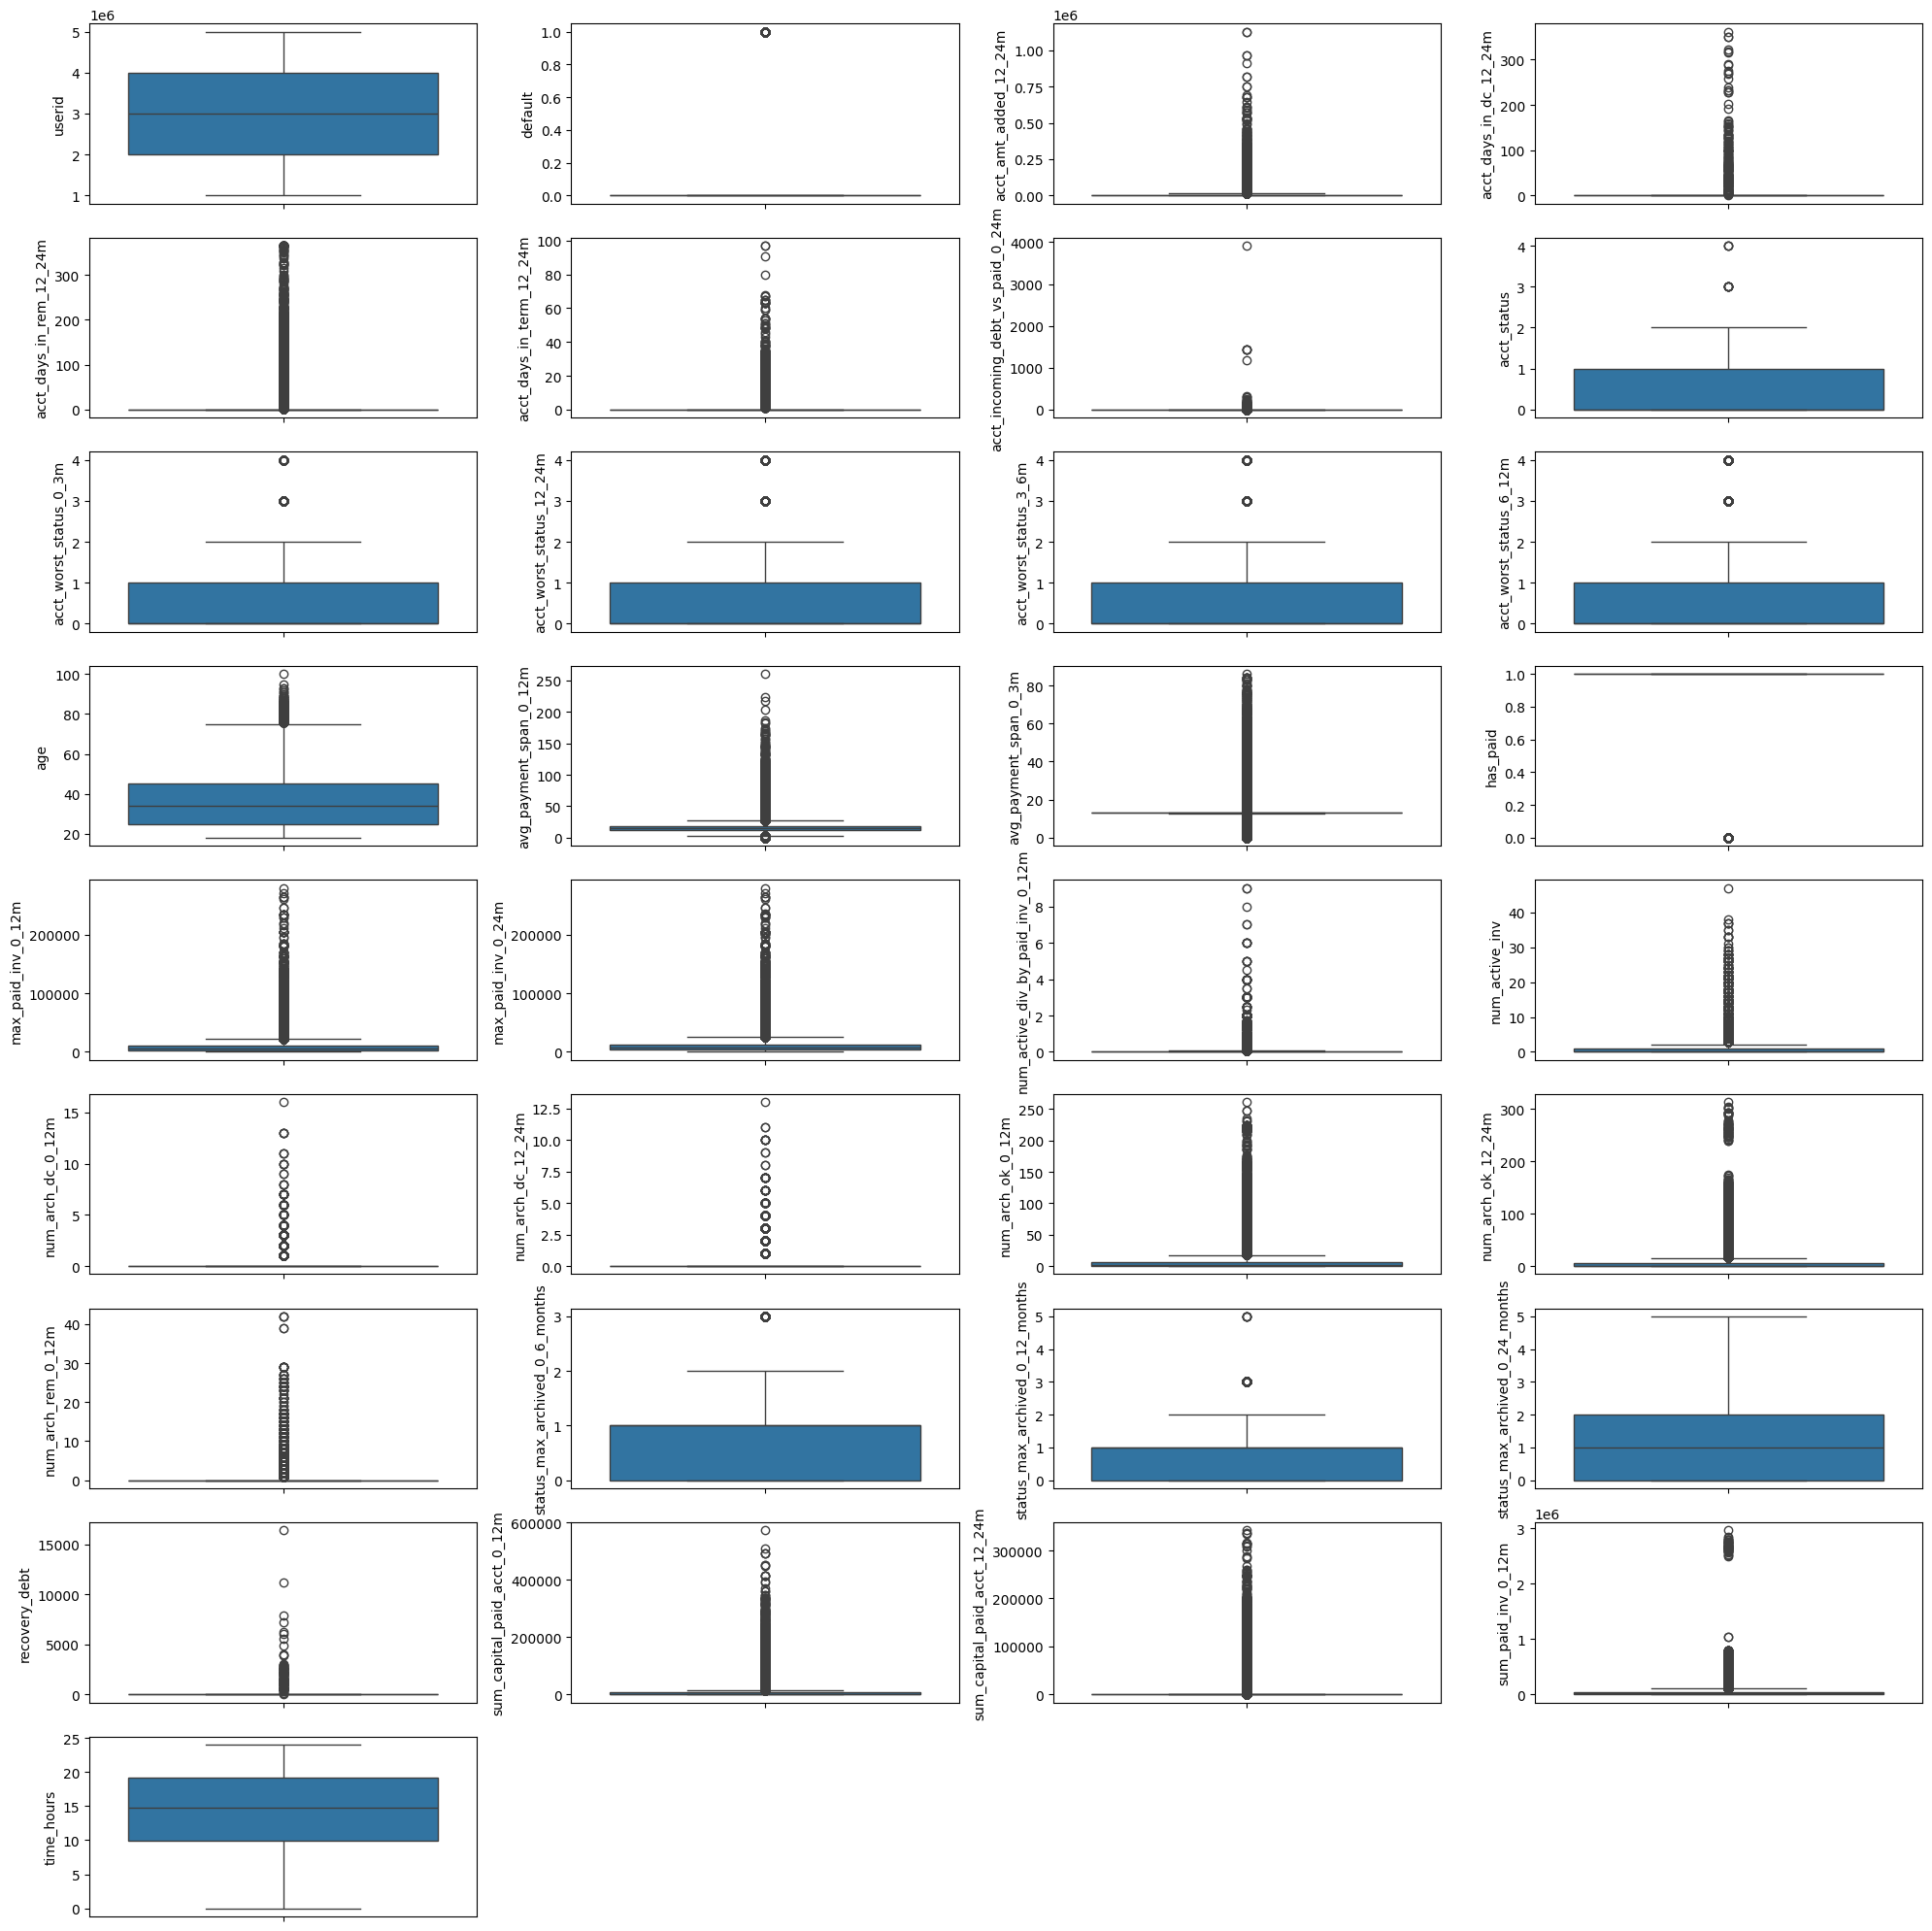

In [70]:
plt.figure(figsize=(20,20))
for f in range(len(num.columns)):
  plt.subplot(9,4,f+1)
  sns.boxplot(num[num.columns[f]])

  plt.tight_layout()


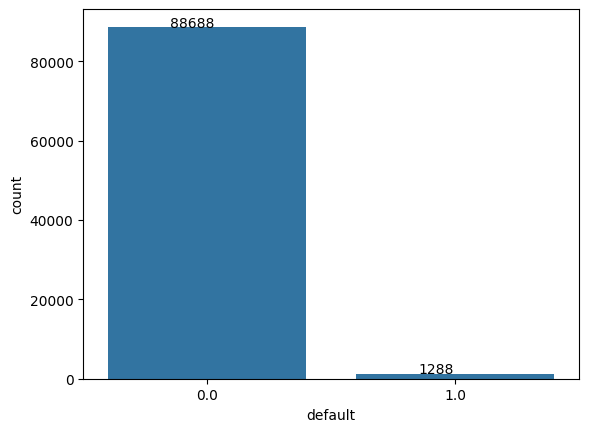

In [71]:
ax=sns.countplot(data=df,x='default')

for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

plt.show()

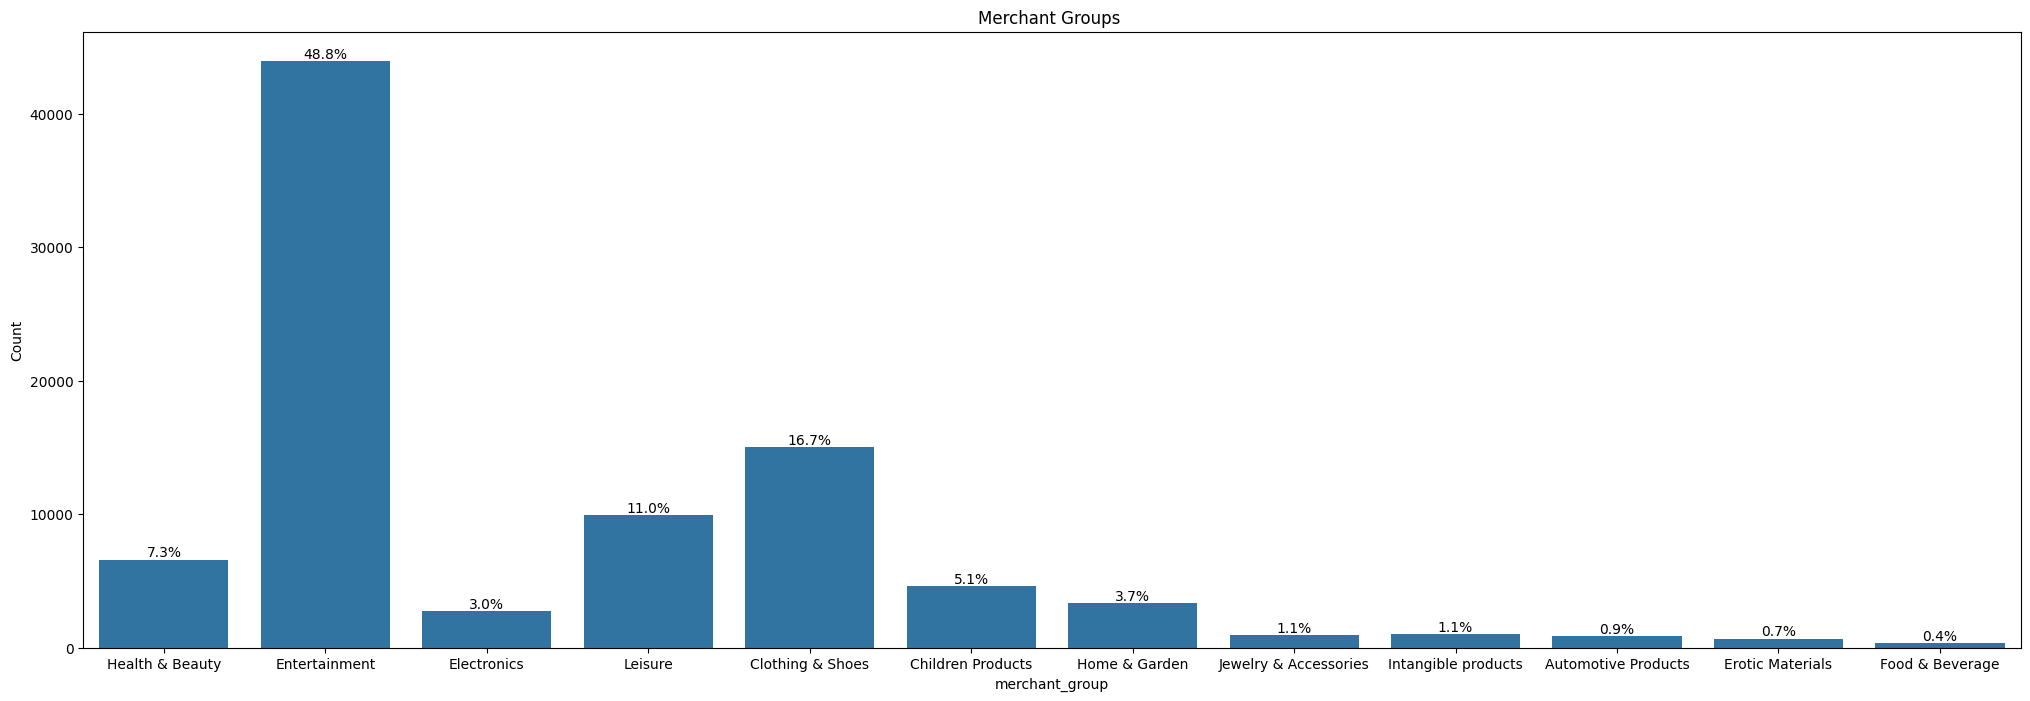

In [72]:
plt.figure(figsize=(25, 8))
ax = sns.countplot(x="merchant_group", data=df)
ax.set(ylabel='Count', title='Merchant Groups ')

for c in ax.containers:

    # custom label calculates percent and add an empty string so 0 value bars don't have a number
    labels = [f'{h/df.merchant_group.count()*100:0.1f}%' if (h := v.get_height()) > 0 else '' for v in c]

    ax.bar_label(c, labels=labels, label_type='edge')

#for p in ax.patches:
 #   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

plt.show()

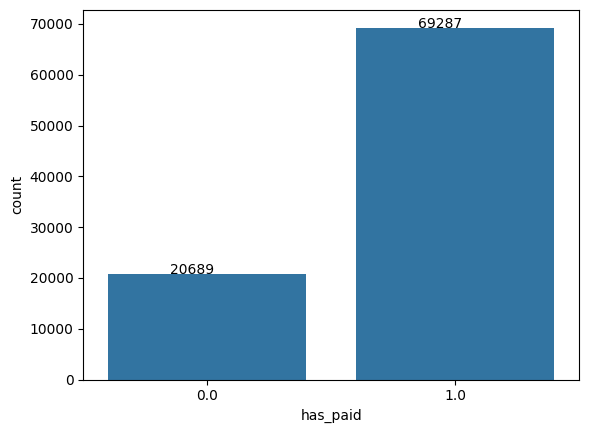

In [73]:
ax=sns.countplot(data=df,x='has_paid')

for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

plt.show()

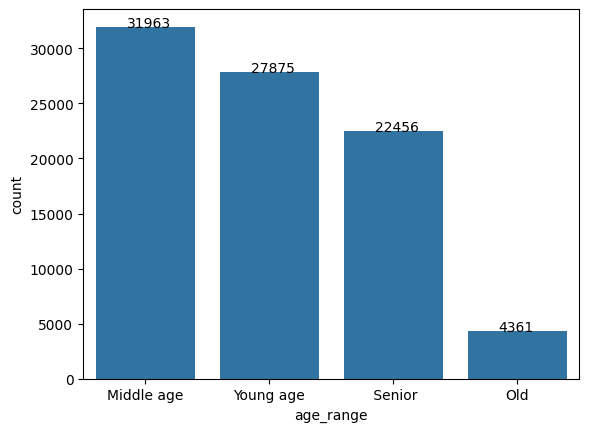

In [74]:
# Show age group in chronological order:
ax= sns.countplot(x = 'age_range',
              data = df,
              order = df['age_range'].value_counts().index)
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

plt.show()

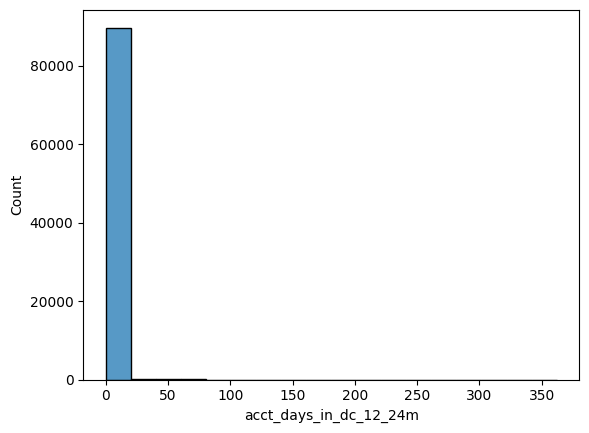

In [75]:
sns.histplot(data=df,x='acct_days_in_dc_12_24m');

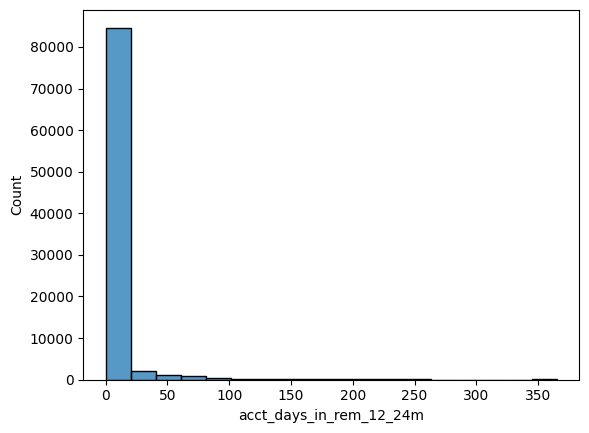

In [76]:
sns.histplot(data=df,x='acct_days_in_rem_12_24m');

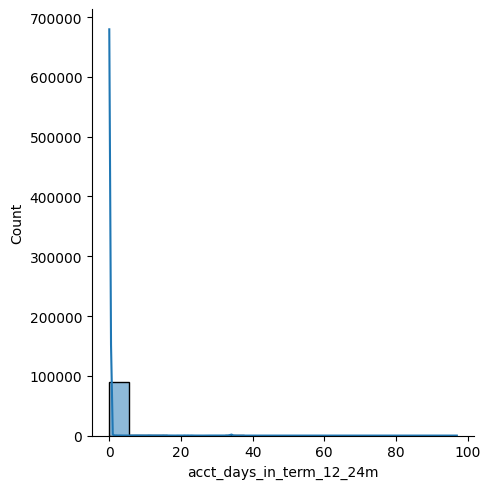

In [77]:
sns.displot(df['acct_days_in_term_12_24m'],kde=True);

UNIVARIATE ANALYSIS

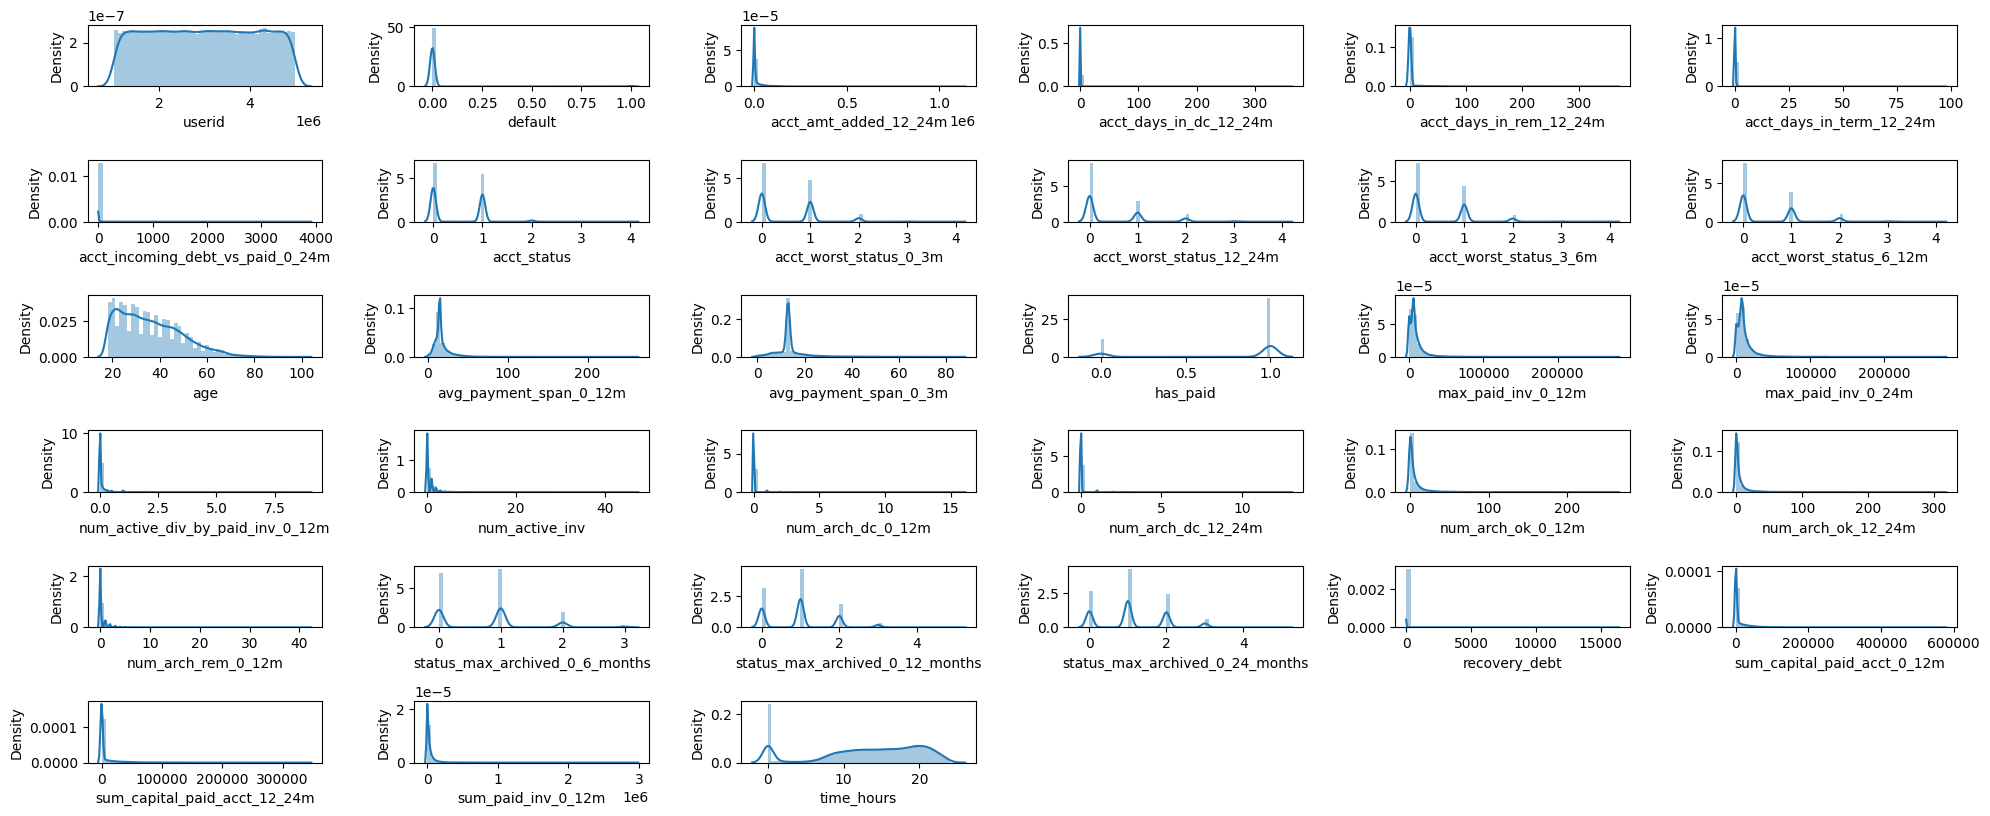

In [78]:
plt.figure(figsize=(20,20))
for f in range(len(num.columns)):
  plt.subplot(15,6,f+1)
  sns.distplot(num[num.columns[f]])

  plt.tight_layout()

BIVARIATE ANALYSIS

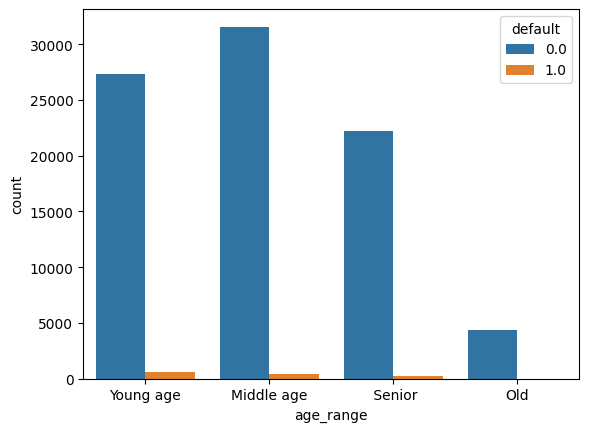

In [79]:
sns.countplot(x='age_range', hue='default', data=df);

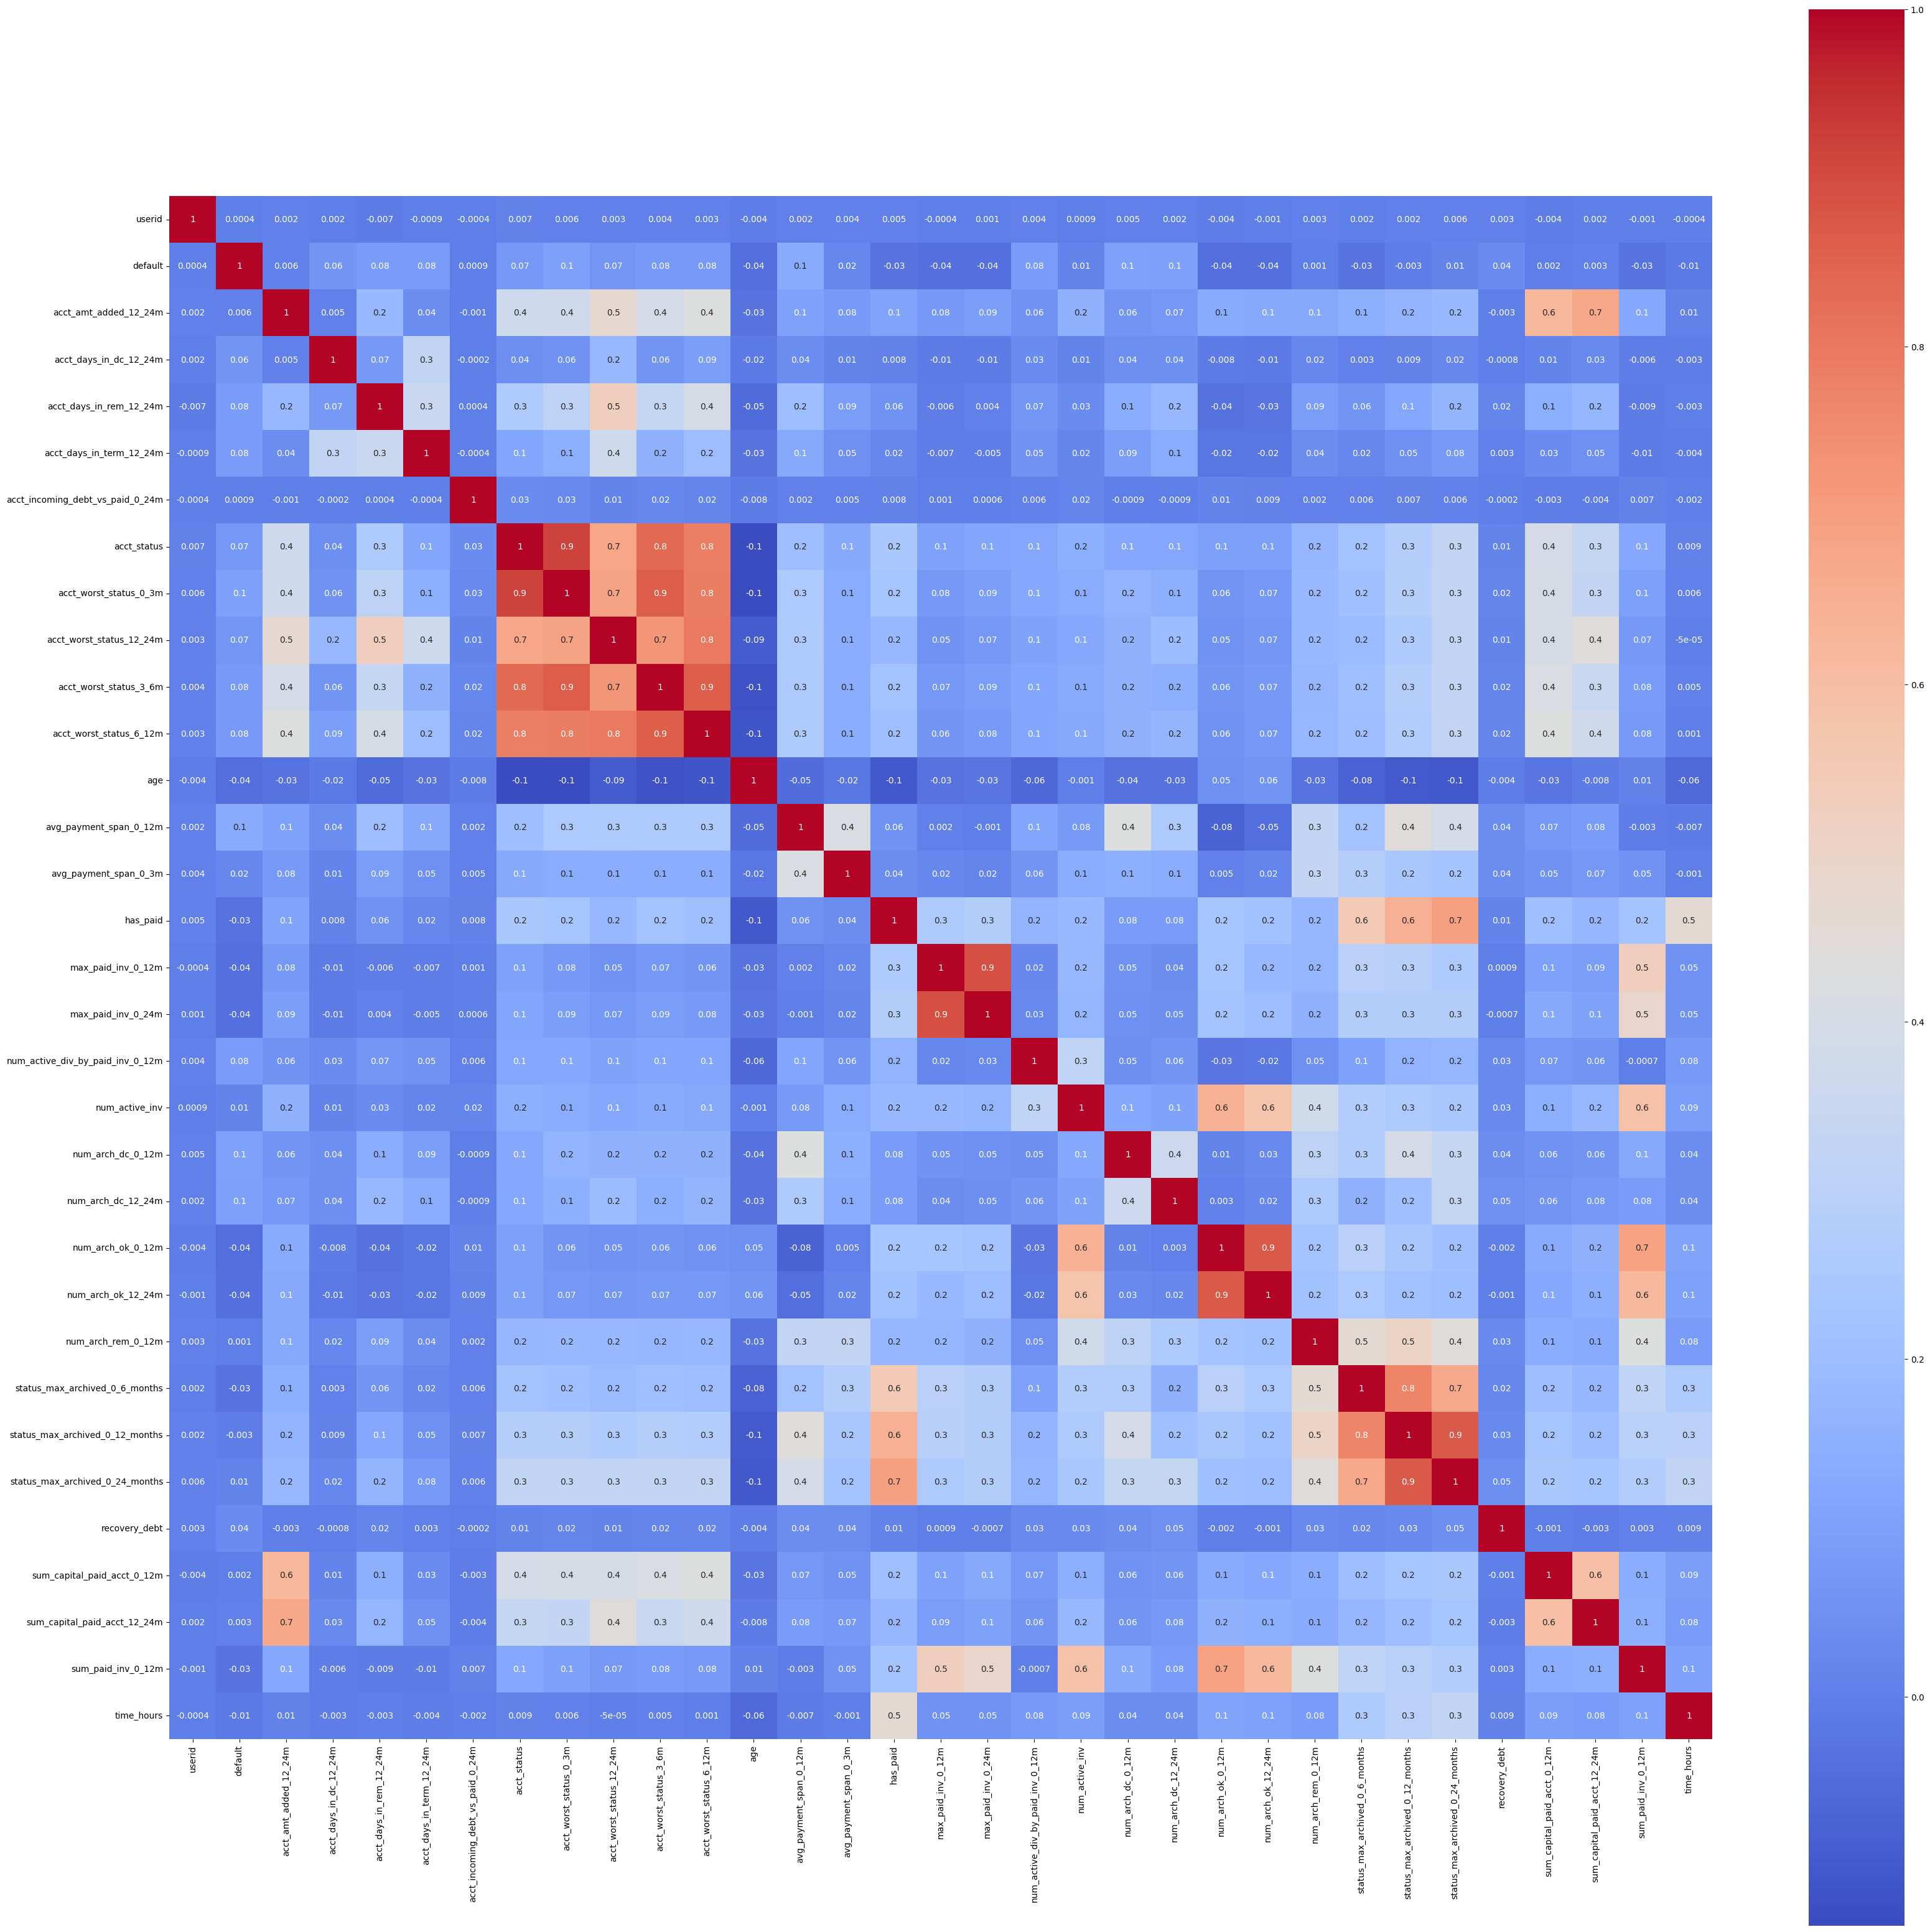

In [80]:
#calculate column correlations and make a seaborn heatmap - Before standardisation

plt.figure(figsize=(40,40))
p=sns.heatmap(num.corr(), annot=True,cmap='coolwarm',square=True, fmt='.1g')
plt.savefig('heatmap_dfx_55vars.jpg', bbox_inches='tight');

LOGISTIC REGRESSION

In [81]:
from sklearn.preprocessing import LabelEncoder

In [82]:
label_encoder=LabelEncoder()
df['merchant_group']=label_encoder.fit_transform(df['merchant_group'])

In [83]:
df['merchant_category']=label_encoder.fit_transform(df['merchant_category'])

In [84]:
df.columns

Index(['userid', 'default', 'acct_amt_added_12_24m', 'acct_days_in_dc_12_24m',
       'acct_days_in_rem_12_24m', 'acct_days_in_term_12_24m',
       'acct_incoming_debt_vs_paid_0_24m', 'acct_status',
       'acct_worst_status_0_3m', 'acct_worst_status_12_24m',
       'acct_worst_status_3_6m', 'acct_worst_status_6_12m', 'age',
       'avg_payment_span_0_12m', 'avg_payment_span_0_3m', 'merchant_category',
       'merchant_group', 'has_paid', 'max_paid_inv_0_12m',
       'max_paid_inv_0_24m', 'num_active_div_by_paid_inv_0_12m',
       'num_active_inv', 'num_arch_dc_0_12m', 'num_arch_dc_12_24m',
       'num_arch_ok_0_12m', 'num_arch_ok_12_24m', 'num_arch_rem_0_12m',
       'status_max_archived_0_6_months', 'status_max_archived_0_12_months',
       'status_max_archived_0_24_months', 'recovery_debt',
       'sum_capital_paid_acct_0_12m', 'sum_capital_paid_acct_12_24m',
       'sum_paid_inv_0_12m', 'time_hours', 'age_range'],
      dtype='object')

In [85]:
X = df.drop(['default', 'age_range', 'userid'],axis=1)
Y = df['default']

In [86]:
# scale the predictor
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X=pd.DataFrame(scaler.fit_transform(X),columns=X.columns)

In [87]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.30,random_state=100,stratify=Y)

In [88]:
print('Number of rows and columns of the training set for the independent variables:',X_train.shape)
print('Number of rows and columns of the training set for the dependent variable:',Y_train.shape)
print('Number of rows and columns of the test set for the independent variables:',X_test.shape)
print('Number of rows and columns of the test set for the dependent variable:',Y_test.shape)

Number of rows and columns of the training set for the independent variables: (62983, 33)
Number of rows and columns of the training set for the dependent variable: (62983,)
Number of rows and columns of the test set for the independent variables: (26993, 33)
Number of rows and columns of the test set for the dependent variable: (26993,)


In [89]:
# Fit the Logistic Regression model
model = LogisticRegression()
model.fit(X_train, Y_train)

LogisticRegression()


Predicting on Training and Test dataset

In [90]:
ytrain_predict = model.predict(X_train)
ytest_predict = model.predict(X_test)

In [91]:

from sklearn.metrics import confusion_matrix , classification_report,roc_curve,roc_auc_score

In [92]:
print(classification_report(Y_train,ytrain_predict))


              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99     62081
         1.0       0.46      0.04      0.07       902

    accuracy                           0.99     62983
   macro avg       0.73      0.52      0.53     62983
weighted avg       0.98      0.99      0.98     62983



In [93]:
print(classification_report(Y_test,ytest_predict))

              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99     26607
         1.0       0.39      0.02      0.04       386

    accuracy                           0.99     26993
   macro avg       0.69      0.51      0.52     26993
weighted avg       0.98      0.99      0.98     26993



In [94]:
ytest_predict

array([0., 0., 0., ..., 0., 0., 0.])

Getting the Predicted Classes and Probs

In [95]:
ytrain_predict_prob=model.predict_proba(X_train)
ytrain_predict_prob=ytrain_predict_prob[:,1]

In [96]:
train_ftr,train_tpr,train_thresholds=roc_curve(Y_train,ytrain_predict_prob)

In [97]:
optimum_idx=np.argmax(train_tpr-train_ftr)
optimum_threshold=train_thresholds[optimum_idx]
optimum_threshold


0.013226495251682777

In [98]:
y_train_predicted=[]
for i in ytrain_predict_prob:
    if i>optimum_threshold:
        y_train_predicted.append(1)
    else:
        y_train_predicted.append(0)

In [99]:
print(classification_report(Y_train,y_train_predicted))

              precision    recall  f1-score   support

         0.0       1.00      0.71      0.83     62081
         1.0       0.04      0.86      0.08       902

    accuracy                           0.71     62983
   macro avg       0.52      0.78      0.45     62983
weighted avg       0.98      0.71      0.82     62983



Test

In [100]:
ytest_predict_prob=model.predict_proba(X_test)
ytest_predict_prob=ytest_predict_prob[:,1]

In [101]:
test_ftr,test_tpr,test_thresholds=roc_curve(Y_test,ytest_predict_prob)

In [102]:
optimum_idx=np.argmax(test_tpr-test_ftr)
optimum_threshold=test_thresholds[optimum_idx]
optimum_threshold


0.016697477459609353

In [103]:
y_test_predicted=[]
for i in ytest_predict_prob:
    if i>optimum_threshold:
        y_test_predicted.append(1)
    else:
        y_test_predicted.append(0)

In [104]:
print(classification_report(Y_test,y_test_predicted))

              precision    recall  f1-score   support

         0.0       1.00      0.77      0.87     26607
         1.0       0.05      0.77      0.09       386

    accuracy                           0.77     26993
   macro avg       0.52      0.77      0.48     26993
weighted avg       0.98      0.77      0.86     26993



Applying GridSearchCV for Logistic Regression

In [105]:
grid={'penalty':['l1','l2','none'],
      'solver':['saga','lbfgs', 'newton-cg'],
      'tol':[0.001,0.0001,0.00001]}

In [106]:
model = LogisticRegression()

In [107]:
grid_search = GridSearchCV(estimator = model, param_grid = grid, cv = 5,n_jobs=-1,scoring='f1')

In [108]:
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'penalty': ['l1', 'l2', 'none'],
                         'solver': ['saga', 'lbfgs', 'newton-cg'],
                         'tol': [0.001, 0.0001, 1e-05]},
             scoring='f1')

In [109]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'penalty': 'l2', 'solver': 'lbfgs', 'tol': 0.001} 

LogisticRegression(tol=0.001)


In [110]:
best_model = grid_search.best_estimator_

In [111]:
# Prediction on the training set

ytrain_predict = best_model.predict(X_train)
ytest_predict = best_model.predict(X_test)

In [112]:
## Getting the probabilities on the test set

ytest_predict_prob=best_model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.999596,0.000404
1,0.999986,0.000014
2,0.989234,0.010766
3,0.991428,0.008572
4,0.986069,0.013931


In [113]:
!pip install scikit-learn
import sklearn
from sklearn.metrics import ConfusionMatrixDisplay

In [114]:
## Confusion matrix on the training data
print(classification_report(Y_train, ytrain_predict),'\n');

              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99     62081
         1.0       0.46      0.04      0.07       902

    accuracy                           0.99     62983
   macro avg       0.73      0.52      0.53     62983
weighted avg       0.98      0.99      0.98     62983
 



In [115]:
ytrain_predict_prob=best_model.predict_proba(X_train)
ytrain_predict_prob=ytrain_predict_prob[:,1]


In [116]:

train_ftr,train_tpr,train_thresholds=roc_curve(Y_train,ytrain_predict_prob)

In [117]:

optimum_idx=np.argmax(train_tpr-train_ftr)
optimum_threshold=train_thresholds[optimum_idx]
optimum_threshold

0.013226495251682777

In [118]:
y_train_predicted=[]
for i in ytrain_predict_prob:
    if i>optimum_threshold:
        y_train_predicted.append(1)
    else:
        y_train_predicted.append(0)

In [119]:
print(classification_report(Y_train,y_train_predicted))

              precision    recall  f1-score   support

         0.0       1.00      0.71      0.83     62081
         1.0       0.04      0.86      0.08       902

    accuracy                           0.71     62983
   macro avg       0.52      0.78      0.45     62983
weighted avg       0.98      0.71      0.82     62983



Test

In [120]:
## Confusion matrix on the test data

print(classification_report(Y_test, ytest_predict),'\n');

              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99     26607
         1.0       0.39      0.02      0.04       386

    accuracy                           0.99     26993
   macro avg       0.69      0.51      0.52     26993
weighted avg       0.98      0.99      0.98     26993
 



In [121]:
ytest_predict_prob=best_model.predict_proba(X_test)
ytest_predict_prob=ytest_predict_prob[:,1]

In [122]:
test_ftr,test_tpr,test_thresholds=roc_curve(Y_test,ytest_predict_prob)

In [123]:
optimum_idx=np.argmax(test_tpr-test_ftr)
optimum_threshold=test_thresholds[optimum_idx]
optimum_threshold

0.016697477459609353

In [124]:
y_test_predicted=[]
for i in ytest_predict_prob:
    if i>optimum_threshold:
        y_test_predicted.append(1)
    else:
        y_test_predicted.append(0)

In [125]:

print(classification_report(Y_test,y_test_predicted))

              precision    recall  f1-score   support

         0.0       1.00      0.77      0.87     26607
         1.0       0.05      0.77      0.09       386

    accuracy                           0.77     26993
   macro avg       0.52      0.77      0.48     26993
weighted avg       0.98      0.77      0.86     26993



Logistic completed

LDA

Training Data and Test Data Confusion Matrix Comparison

Train (70%) - Test (30%) Split

In [126]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics,model_selection
from sklearn.preprocessing import scale

In [127]:
# Creating a copy of the original data frame
df_latest = df.copy()

In [128]:
Y.value_counts('%')

default
0.0    0.985685
1.0    0.014315
Name: proportion, dtype: float64

In [129]:
Y_train.value_counts('%')

default
0.0    0.985679
1.0    0.014321
Name: proportion, dtype: float64

In [130]:
Y_test.value_counts('%')

default
0.0    0.9857
1.0    0.0143
Name: proportion, dtype: float64

Applying Standard Scaler to scale the data

In [131]:
from sklearn.preprocessing import StandardScaler
stand_scal = StandardScaler()
X_train = stand_scal.fit_transform(X_train)
X_test = stand_scal.transform (X_test)

LDA Model

In [132]:
#Build LDA Model
clf = LinearDiscriminantAnalysis()
model=clf.fit(X_train,Y_train)

Prediction

In [133]:
# Training Data Class Prediction with a cut-off value of 0.5
pred_class_train = model.predict(X_train)

# Test Data Class Prediction with a cut-off value of 0.5
pred_class_test = model.predict(X_test)

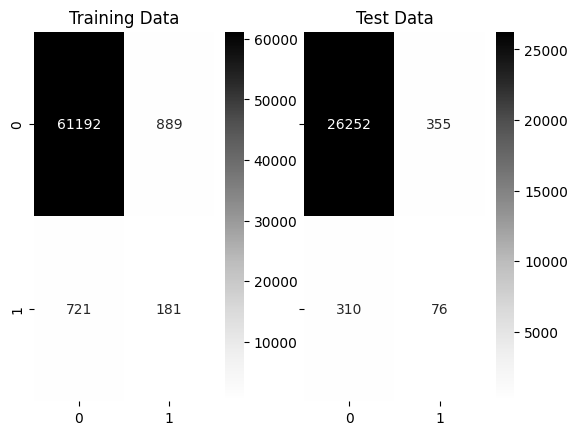

In [134]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(Y_train,pred_class_train)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(Y_test,pred_class_test)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('Test Data');

Training Data and Test Data Classification Report Comparison

In [135]:
print('Classification Report of the training data:\n\n',metrics.classification_report(Y_train,pred_class_train),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(Y_test,pred_class_test),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

         0.0       0.99      0.99      0.99     62081
         1.0       0.17      0.20      0.18       902

    accuracy                           0.97     62983
   macro avg       0.58      0.59      0.59     62983
weighted avg       0.98      0.97      0.98     62983
 

Classification Report of the test data:

               precision    recall  f1-score   support

         0.0       0.99      0.99      0.99     26607
         1.0       0.18      0.20      0.19       386

    accuracy                           0.98     26993
   macro avg       0.58      0.59      0.59     26993
weighted avg       0.98      0.98      0.98     26993
 



Inferences using the default value 0.5 for cut-off for test data

For {Customer who didnot default (Label 0 )}:

Precision (99%) – 99% of Customers who didnot default are correctly predicted ,out of all Customers
who didnot default that are predicted .

Recall (99%) – Out of all the Customers who actually didnot default,
99% of Customers who didnot default have been predicted correctly .

For {Customer who did default (Label 1 )}:

Precision (18%) – 18% of Customers who did default are correctly predicted ,
out of all Customers who did default that are predicted .

Recall (20%) – Out of all the Customers who actually did default, 20% of Customers who did default have been predicted
correctly .

Overall accuracy of the model – 98 % of total predictions are correct

Accuracy, AUC, Precision and Recall for test data is almost inline with training data. This proves no overfitting or underfitting has happened, and overall the model is a good model for classification

Probability prediction for the training and test data

In [136]:
# Training Data Probability Prediction
pred_prob_train = model.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test = model.predict_proba(X_test)

AUC for the Training Data: 0.851
AUC for the Test Data: 0.852


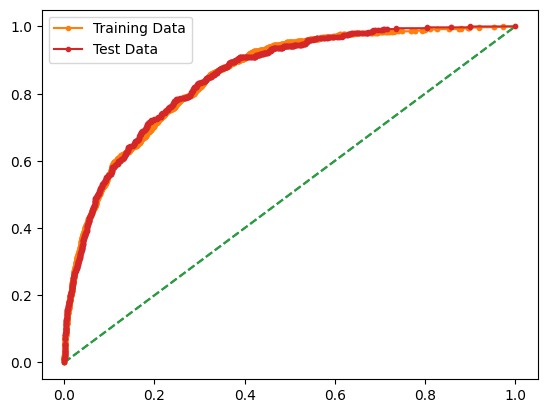

In [137]:
# AUC and ROC for the training data

# calculate AUC
auc = metrics.roc_auc_score(Y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(Y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(Y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(Y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

In [138]:
pred_prob_train[:,1]

array([0.00322532, 0.00065608, 0.00395572, ..., 0.00690138, 0.00288132,
       0.02916557])

Generate Coefficients and intercept for the Linear Discriminant Function

In [139]:
#intercept value
clf.intercept_

array([-6.15845959])

In [140]:
#coefficients for the Linear Discriminant Function
clf.coef_

array([[-0.06809739,  0.39474876,  0.26628739,  0.32313385, -0.00775995,
        -0.35275467,  1.32754767, -0.58380266, -0.27047406,  0.23411469,
        -0.25600232,  1.12057078, -0.28857387,  0.10196231, -0.03389687,
        -0.07477322,  0.06159821, -0.22762454,  0.64661046,  0.03994865,
         0.4229396 ,  0.54957393,  0.16664404, -0.17248501, -0.21098405,
        -0.00328953, -0.87849342, -0.01045442,  0.2978112 , -0.07663997,
        -0.01240708,  0.01491969,  0.10233758]])

In [141]:
X.columns

Index(['acct_amt_added_12_24m', 'acct_days_in_dc_12_24m',
       'acct_days_in_rem_12_24m', 'acct_days_in_term_12_24m',
       'acct_incoming_debt_vs_paid_0_24m', 'acct_status',
       'acct_worst_status_0_3m', 'acct_worst_status_12_24m',
       'acct_worst_status_3_6m', 'acct_worst_status_6_12m', 'age',
       'avg_payment_span_0_12m', 'avg_payment_span_0_3m', 'merchant_category',
       'merchant_group', 'has_paid', 'max_paid_inv_0_12m',
       'max_paid_inv_0_24m', 'num_active_div_by_paid_inv_0_12m',
       'num_active_inv', 'num_arch_dc_0_12m', 'num_arch_dc_12_24m',
       'num_arch_ok_0_12m', 'num_arch_ok_12_24m', 'num_arch_rem_0_12m',
       'status_max_archived_0_6_months', 'status_max_archived_0_12_months',
       'status_max_archived_0_24_months', 'recovery_debt',
       'sum_capital_paid_acct_0_12m', 'sum_capital_paid_acct_12_24m',
       'sum_paid_inv_0_12m', 'time_hours'],
      dtype='object')

In [142]:
a=clf.coef_
np.round(a,2) # rounded up coefficients

array([[-0.07,  0.39,  0.27,  0.32, -0.01, -0.35,  1.33, -0.58, -0.27,
         0.23, -0.26,  1.12, -0.29,  0.1 , -0.03, -0.07,  0.06, -0.23,
         0.65,  0.04,  0.42,  0.55,  0.17, -0.17, -0.21, -0.  , -0.88,
        -0.01,  0.3 , -0.08, -0.01,  0.01,  0.1 ]])

By the above equation and the coefficients it is clear that
predictor 'acct_worst_status_0_3m' and 'avg_payment_span_0_12m' has the largest magnitude thus this helps in classifying the best
predictor 'status_max_archived_0_12_months' has the smallest magnitude thus this helps in classifying the least


#####

AUC Value closer to 1 tells that there is good seperatibility between the predicted classes and thus the model is good for prediction

ROC Curve visually represents the above concept where the plot should be as far as possible from the diagnol.

Decision tree

In [143]:
df.columns

Index(['userid', 'default', 'acct_amt_added_12_24m', 'acct_days_in_dc_12_24m',
       'acct_days_in_rem_12_24m', 'acct_days_in_term_12_24m',
       'acct_incoming_debt_vs_paid_0_24m', 'acct_status',
       'acct_worst_status_0_3m', 'acct_worst_status_12_24m',
       'acct_worst_status_3_6m', 'acct_worst_status_6_12m', 'age',
       'avg_payment_span_0_12m', 'avg_payment_span_0_3m', 'merchant_category',
       'merchant_group', 'has_paid', 'max_paid_inv_0_12m',
       'max_paid_inv_0_24m', 'num_active_div_by_paid_inv_0_12m',
       'num_active_inv', 'num_arch_dc_0_12m', 'num_arch_dc_12_24m',
       'num_arch_ok_0_12m', 'num_arch_ok_12_24m', 'num_arch_rem_0_12m',
       'status_max_archived_0_6_months', 'status_max_archived_0_12_months',
       'status_max_archived_0_24_months', 'recovery_debt',
       'sum_capital_paid_acct_0_12m', 'sum_capital_paid_acct_12_24m',
       'sum_paid_inv_0_12m', 'time_hours', 'age_range'],
      dtype='object')

In [144]:
x = df.drop(['default', 'age_range', 'userid'],axis=1)
y = df['default']

In [145]:
x.columns

Index(['acct_amt_added_12_24m', 'acct_days_in_dc_12_24m',
       'acct_days_in_rem_12_24m', 'acct_days_in_term_12_24m',
       'acct_incoming_debt_vs_paid_0_24m', 'acct_status',
       'acct_worst_status_0_3m', 'acct_worst_status_12_24m',
       'acct_worst_status_3_6m', 'acct_worst_status_6_12m', 'age',
       'avg_payment_span_0_12m', 'avg_payment_span_0_3m', 'merchant_category',
       'merchant_group', 'has_paid', 'max_paid_inv_0_12m',
       'max_paid_inv_0_24m', 'num_active_div_by_paid_inv_0_12m',
       'num_active_inv', 'num_arch_dc_0_12m', 'num_arch_dc_12_24m',
       'num_arch_ok_0_12m', 'num_arch_ok_12_24m', 'num_arch_rem_0_12m',
       'status_max_archived_0_6_months', 'status_max_archived_0_12_months',
       'status_max_archived_0_24_months', 'recovery_debt',
       'sum_capital_paid_acct_0_12m', 'sum_capital_paid_acct_12_24m',
       'sum_paid_inv_0_12m', 'time_hours'],
      dtype='object')

In [146]:
# splitting data into training and test set for independent attributes
from sklearn.model_selection import train_test_split

X_train, X_test, train_labels, test_labels = train_test_split(x, y, test_size=.30, random_state=1)

In [147]:
from sklearn.tree import DecisionTreeClassifier

In [148]:
dt_model = DecisionTreeClassifier(criterion = 'gini' )

In [149]:
dt_model.fit(X_train, train_labels)

DecisionTreeClassifier()

In [150]:
from sklearn import tree

train_char_label = ['No', 'Yes']
Credit_Tree_File = open('d:\credit_tree.dot','w')
dot_data = tree.export_graphviz(dt_model, out_file=Credit_Tree_File, feature_names = list(X_train), class_names = list(train_char_label))

Credit_Tree_File.close()

In [151]:
# importance of features in the tree building ( The importance of a feature is computed as the
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns))

                                       Imp
acct_amt_added_12_24m             0.031111
acct_days_in_dc_12_24m            0.005048
acct_days_in_rem_12_24m           0.017567
acct_days_in_term_12_24m          0.009003
acct_incoming_debt_vs_paid_0_24m  0.059958
acct_status                       0.005562
acct_worst_status_0_3m            0.024085
acct_worst_status_12_24m          0.008875
acct_worst_status_3_6m            0.014481
acct_worst_status_6_12m           0.012765
age                               0.101101
avg_payment_span_0_12m            0.077632
avg_payment_span_0_3m             0.032938
merchant_category                 0.060719
merchant_group                    0.034148
has_paid                          0.006449
max_paid_inv_0_12m                0.032829
max_paid_inv_0_24m                0.047252
num_active_div_by_paid_inv_0_12m  0.022496
num_active_inv                    0.012548
num_arch_dc_0_12m                 0.011727
num_arch_dc_12_24m                0.018227
num_arch_ok

In [152]:
y_train_predict = dt_model.predict(X_train)

In [153]:
y_test_predict = dt_model.predict(X_test)

In [154]:
print(classification_report(train_labels, y_train_predict))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     62076
         1.0       1.00      0.95      0.97       907

    accuracy                           1.00     62983
   macro avg       1.00      0.97      0.99     62983
weighted avg       1.00      1.00      1.00     62983



In [155]:
print(classification_report(test_labels, y_test_predict))

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99     26612
         1.0       0.17      0.19      0.18       381

    accuracy                           0.98     26993
   macro avg       0.58      0.59      0.58     26993
weighted avg       0.98      0.98      0.98     26993



In [156]:
grid={'criterion':['gini', 'entropy','log_loss'],'max_features':['auto', 'sqrt', 'log2'],'max_depth':[10,15,20],
      'min_samples_leaf':[10,15,20],'ccp_alpha':[0.01,0.001]}

In [157]:
model_grid=GridSearchCV(estimator=dt_model,param_grid=grid,n_jobs=-1,cv=5,verbose=True)

In [158]:
model_grid.fit(X_train,train_labels)

Fitting 5 folds for each of 162 candidates, totalling 810 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'ccp_alpha': [0.01, 0.001],
                         'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [10, 15, 20],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [10, 15, 20]},
             verbose=True)

In [159]:
model_grid.best_params_

{'ccp_alpha': 0.01,
 'criterion': 'gini',
 'max_depth': 10,
 'max_features': 'auto',
 'min_samples_leaf': 10}

In [160]:
best_model = grid_search.best_estimator_

In [161]:
X_train.T

,34842,83238,50391,88500,84842,19269,3447,81873,41201,9702,...,31228,43757,7751,49100,20609,21440,73349,50057,5192,77708
acct_amt_added_12_24m,0.0000,0.0000,0.000000,27116.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,62254.000000,0.000000,0.000000,0.000000,11569.000000,0.000000,7934.000000,0.000000,70007.000000
acct_days_in_dc_12_24m,0.0000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
acct_days_in_rem_12_24m,0.0000,0.0000,0.000000,57.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,30.000000
acct_days_in_term_12_24m,0.0000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
acct_incoming_debt_vs_paid_0_24m,0.0000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.421036,...,0.000000,0.489482,0.000000,0.000000,0.000000,0.003650,0.000000,1.545544,0.000000,0.512166
acct_status,0.0000,0.0000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,...,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000
acct_worst_status_0_3m,0.0000,0.0000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,...,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,2.000000,0.000000,1.000000
acct_worst_status_12_24m,0.0000,0.0000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,2.000000
acct_worst_status_3_6m,0.0000,0.0000,0.000000,3.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,...,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,2.000000,0.000000,1.000000
acct_worst_status_6_12m,0.0000,0.0000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000


In [162]:
# Prediction on the training set

ytrain_predict = best_model.predict(X_train)
ytest_predict = best_model.predict(X_test)


In [163]:
print(classification_report(train_labels, ytrain_predict))

              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99     62076
         1.0       0.21      0.00      0.01       907

    accuracy                           0.99     62983
   macro avg       0.60      0.50      0.50     62983
weighted avg       0.97      0.99      0.98     62983



In [164]:
print(classification_report(test_labels, ytest_predict))

              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99     26612
         1.0       0.43      0.01      0.02       381

    accuracy                           0.99     26993
   macro avg       0.71      0.50      0.50     26993
weighted avg       0.98      0.99      0.98     26993



In [165]:
from imblearn.over_sampling import SMOTE

In [166]:
print("Before OverSampling, counts of label '1': {}".format(sum(train_labels == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(train_labels == 0)))

Before OverSampling, counts of label '1': 907
Before OverSampling, counts of label '0': 62076 



In [167]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 123)
x_train_res, y_train_res = sm.fit_resample(X_train, train_labels.ravel())

In [168]:
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

After OverSampling, counts of label '1': 62076
After OverSampling, counts of label '0': 62076


In [169]:
best_resample_model=best_model.fit(x_train_res,y_train_res)

In [170]:
y_train_res_predict=best_resample_model.predict(x_train_res)
y_test_res_predict=best_resample_model.predict(X_test)

In [171]:
print(classification_report(y_train_res,y_train_res_predict))

              precision    recall  f1-score   support

         0.0       0.77      0.74      0.75     62076
         1.0       0.75      0.78      0.76     62076

    accuracy                           0.76    124152
   macro avg       0.76      0.76      0.76    124152
weighted avg       0.76      0.76      0.76    124152



In [172]:
print(classification_report(test_labels,y_test_res_predict))

              precision    recall  f1-score   support

         0.0       1.00      0.74      0.85     26612
         1.0       0.04      0.75      0.07       381

    accuracy                           0.74     26993
   macro avg       0.52      0.74      0.46     26993
weighted avg       0.98      0.74      0.84     26993



In [173]:
print(model_grid.best_params_)

{'ccp_alpha': 0.01, 'criterion': 'gini', 'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 10}


AUC: 0.813


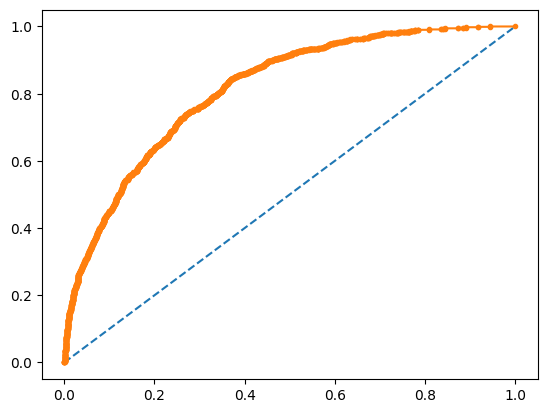

In [174]:
 #AUC and ROC for the training data

# predict probabilities
probs = best_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

AUC: 0.816


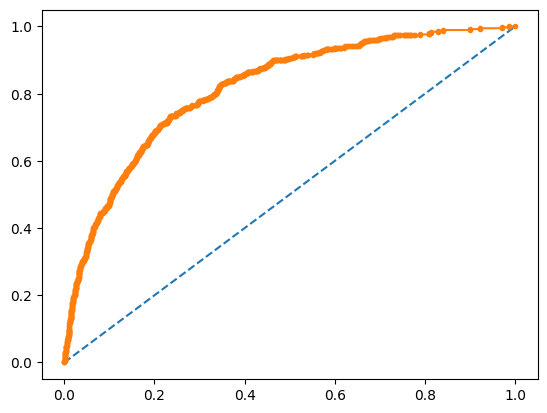

In [175]:
# AUC and ROC for the test data


# predict probabilities
probs = best_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

BAGGING

In [176]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
cart = DecisionTreeClassifier()
Bagging_model=BaggingClassifier(base_estimator=cart,n_estimators=100,random_state=1)
Bagging_model.fit(X_train, Y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100,
                  random_state=1)

In [177]:
## Performance Matrix on train data set
y_train_predict = Bagging_model.predict(X_train)
model_score =Bagging_model.score(X_train, Y_train)
print(model_score)
print(metrics.confusion_matrix(Y_train, y_train_predict))
print(metrics.classification_report(Y_train, y_train_predict))

0.9994442944921645
[[62081     0]
 [   35   867]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     62081
         1.0       1.00      0.96      0.98       902

    accuracy                           1.00     62983
   macro avg       1.00      0.98      0.99     62983
weighted avg       1.00      1.00      1.00     62983



In [178]:
## Performance Matrix on test data set
y_test_predict = Bagging_model.predict(X_test)
model_score = Bagging_model.score(X_test, Y_test)
print(model_score)
print(metrics.confusion_matrix(Y_test, y_test_predict))
print(metrics.classification_report(Y_test, y_test_predict))

0.9856629496536139
[[26606     1]
 [  386     0]]
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99     26607
         1.0       0.00      0.00      0.00       386

    accuracy                           0.99     26993
   macro avg       0.49      0.50      0.50     26993
weighted avg       0.97      0.99      0.98     26993



KNN

In [179]:
from sklearn.neighbors import KNeighborsClassifier

In [180]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=3)

KNN model Classification Report on Train Data 
               precision    recall  f1-score   support

         0.0       0.99      1.00      0.99     62081
         1.0       0.59      0.02      0.04       902

    accuracy                           0.99     62983
   macro avg       0.79      0.51      0.52     62983
weighted avg       0.98      0.99      0.98     62983



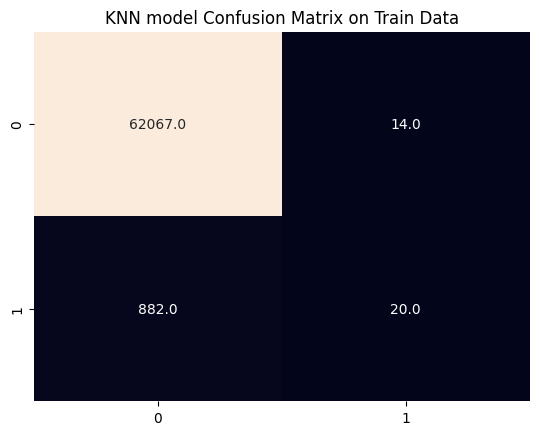

In [181]:
# Train
y_train_pred=knn.predict(X_train)
sns.heatmap(confusion_matrix(Y_train,y_train_pred),annot=True,fmt='.1f',cbar=False)
plt.title('KNN model Confusion Matrix on Train Data')

print('KNN model Classification Report on Train Data \n',classification_report(Y_train,y_train_pred))

KNN model Classification Report on Test Data 
               precision    recall  f1-score   support

         0.0       0.99      1.00      0.99     26607
         1.0       0.00      0.00      0.00       386

    accuracy                           0.99     26993
   macro avg       0.49      0.50      0.50     26993
weighted avg       0.97      0.99      0.98     26993



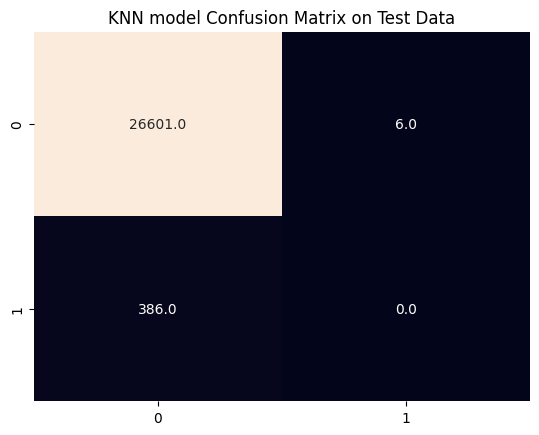

In [182]:
# Test
y_test_pred=knn.predict(X_test)
sns.heatmap(confusion_matrix(Y_test,y_test_pred),annot=True,fmt='.1f',cbar=False)
plt.title('KNN model Confusion Matrix on Test Data')
print('KNN model Classification Report on Test Data \n',classification_report(Y_test,y_test_pred))

In [183]:
pred_prob_train = model.predict_proba(X_train)


In [184]:
# Test Data Probability Prediction
pred_prob_test = model.predict_proba(X_test)

In [185]:
# calculate AUC
auc = metrics.roc_auc_score(Y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)

AUC for the Training Data: 0.497


In [186]:
# calculate AUC
auc = metrics.roc_auc_score(Y_test,pred_prob_test[:,1])
print('AUC for the test Data: %.3f' % auc)


AUC for the test Data: 0.518


BOOSTING

In [189]:
from sklearn.ensemble import AdaBoostClassifier

In [191]:
adaboost_model1=AdaBoostClassifier(n_estimators=8)
adaboost_model1.fit(X_train,Y_train)

AdaBoostClassifier(n_estimators=8)

In [193]:
y_train_predicted=adaboost_model1.predict(X_train)
y_test_predicted=adaboost_model1.predict(X_test)

Adaptive Boosting Model Classification Report on Train Data 
               precision    recall  f1-score   support

         0.0       0.99      1.00      0.99     62081
         1.0       0.00      0.00      0.00       902

    accuracy                           0.99     62983
   macro avg       0.49      0.50      0.50     62983
weighted avg       0.97      0.99      0.98     62983

Adaptive Boosting Model CROC AUC Score on Train Data 
 0.5


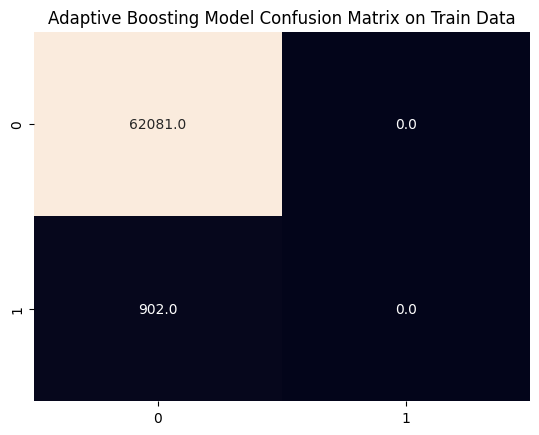

In [195]:
# Train Data
sns.heatmap(confusion_matrix(Y_train,y_train_predicted),annot=True,fmt='0.1f',cbar=False)
plt.title('Adaptive Boosting Model Confusion Matrix on Train Data')
print('Adaptive Boosting Model Classification Report on Train Data \n',classification_report(Y_train,y_train_predicted))
print('Adaptive Boosting Model CROC AUC Score on Train Data \n',roc_auc_score(Y_train,y_train_predicted))

Adaptive Boosting Model Classification Report on Test Data 
               precision    recall  f1-score   support

         0.0       0.99      1.00      0.99     26607
         1.0       0.00      0.00      0.00       386

    accuracy                           0.99     26993
   macro avg       0.49      0.50      0.50     26993
weighted avg       0.97      0.99      0.98     26993

Adaptive Boosting Model ROC AUC Score on Test Data 
 0.5


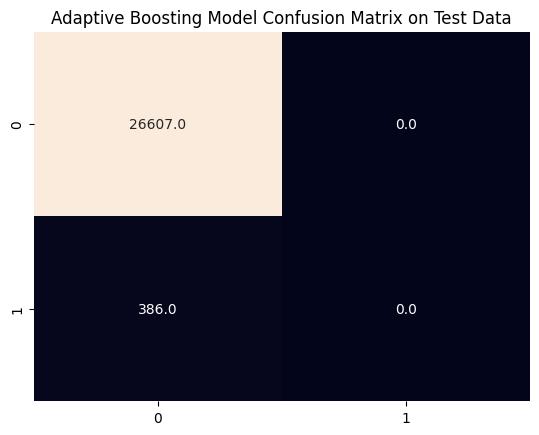

In [197]:
# Test Data
sns.heatmap(confusion_matrix(Y_test,y_test_predicted),annot=True,fmt='0.1f',cbar=False)
plt.title('Adaptive Boosting Model Confusion Matrix on Test Data')
print('Adaptive Boosting Model Classification Report on Test Data \n',classification_report(Y_test,y_test_predicted))
print('Adaptive Boosting Model ROC AUC Score on Test Data \n',roc_auc_score(Y_test,y_test_predicted))

In [198]:
adaboost_model=AdaBoostClassifier(n_estimators=8)
adaboost_model.fit(x_train_res,y_train_res)

AdaBoostClassifier(n_estimators=8)

Adaptive Boosting Model (with SMOTE) Classification Report on Train Data 
               precision    recall  f1-score   support

         0.0       0.91      0.67      0.77     62076
         1.0       0.74      0.94      0.83     62076

    accuracy                           0.80    124152
   macro avg       0.83      0.80      0.80    124152
weighted avg       0.83      0.80      0.80    124152

Adaptive Boosting Model (with SMOTE) ROC AUC Score on Train Data 
 0.8033056253624589


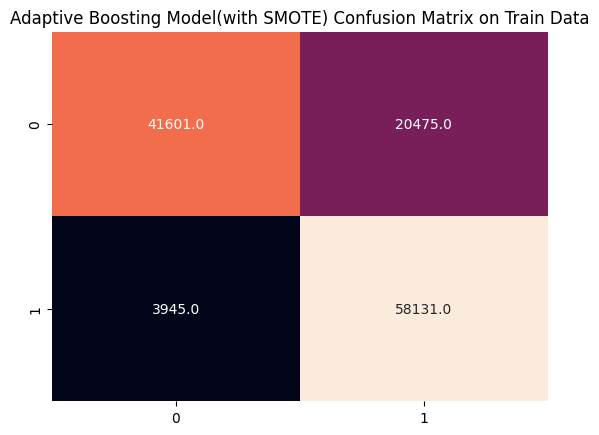

In [200]:
y_train_predicted=adaboost_model.predict(x_train_res)
sns.heatmap(confusion_matrix(y_train_res,y_train_predicted),annot=True,fmt='0.1f',cbar=False)
plt.title('Adaptive Boosting Model(with SMOTE) Confusion Matrix on Train Data')
print('Adaptive Boosting Model (with SMOTE) Classification Report on Train Data \n',classification_report(y_train_res,y_train_predicted))
print('Adaptive Boosting Model (with SMOTE) ROC AUC Score on Train Data \n',roc_auc_score(y_train_res,y_train_predicted))

Adaptive Boosting Model (after SMOTE) Classification Report on Test Data 
               precision    recall  f1-score   support

         0.0       0.99      0.66      0.79     26607
         1.0       0.01      0.32      0.03       386

    accuracy                           0.66     26993
   macro avg       0.50      0.49      0.41     26993
weighted avg       0.97      0.66      0.78     26993

Adaptive Boosting Model (after SMOTE) ROC AUC SCore on Test Data 
 0.4914194830882286


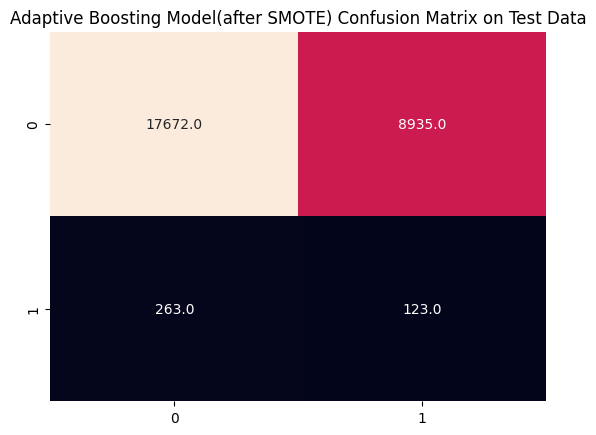

In [203]:
y_test_predicted=adaboost_model.predict(X_test)
sns.heatmap(confusion_matrix(Y_test,y_test_predicted),annot=True,fmt='0.1f',cbar=False)
plt.title('Adaptive Boosting Model(after SMOTE) Confusion Matrix on Test Data')
print('Adaptive Boosting Model (after SMOTE) Classification Report on Test Data \n',classification_report(Y_test,y_test_predicted))
print('Adaptive Boosting Model (after SMOTE) ROC AUC SCore on Test Data \n',roc_auc_score(Y_test,y_test_predicted))